# Datos del Estudiante.

1. Nombre: Luis Felipe Narváez Gómez 
2. Código: 2312660
3. Universidad Santo Tomas seccional Tunja
4. Facultad: Ingeniería de Sistemas
5. Asignatura: Electiva I - Deep Learning
6. Periodo: 2021-2


# Ejercicios de regresion logistica con SKLEARN


## Ejercicio 1

### dataBase = ( horas_estudio_vs_aprobacion.csv )
El primer ejercicio utilizaremos una base de datos en la que se relaciona la cantidad de horas de estudio que tubieron unos estudiantes para un examen, con el resultado que sacaron, esto siendo aprobado y no aprobado.

Con esta base de datos relacionaremos si existe alguna relacion entre las horas que estudia una persona y sus resultados despues de presentar la evaluacion.

La base de datos que se utilizara sera la siguiente:

https://github.com/OnRuiso/Deep-Learning-/blob/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T6/horas_estudio_vs_aprobacion.csv

Como raw seria:

https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T6/horas_estudio_vs_aprobacion.csv


### 1. Cargar Librerias

In [1]:
import numpy as np              #Mejora el soporte para vectores y matrices
import pandas as pd             #Estructura de datos (Ciencia de datos)

import matplotlib.pyplot as plt #Para graficar
import seaborn as sns           #interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)

### 2. Importar base de datos desde GitHub

In [4]:
df = pd.DataFrame()
df = pd.read_csv("https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T6/horas_estudio_vs_aprobacion.csv")

### 3. Que datos tiene la DataBase

In [5]:
df.head(3) #Muestra los 3 primeros valores de la base de datos

,horas,aprueba
0,0.50,1
1,2.00,0
2,0.75,0


In [6]:
df.shape #dimensiones del db o df (Database y DataFrame)

(2000, 2)

In [7]:
df.isnull().sum() #si hay datos nulos en la base de datos, ve sumando por cada que encuentres uno (contador)

horas      0
aprueba    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


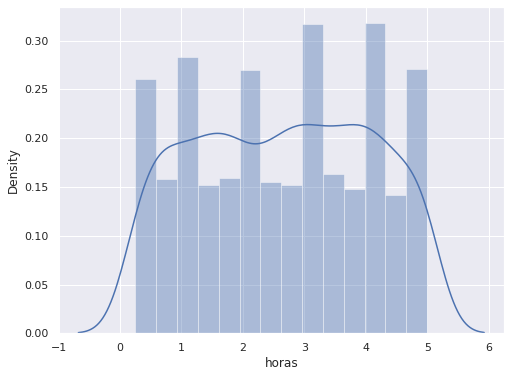

In [11]:
#Con el siguiente grafico podemos hallar la horas de estudio dedicadas en promedio para estudio
sns.set(rc={'figure.figsize':(8,6)})  #tamaño del grafico
sns.distplot(df['horas'])                #agregamos los datos
plt.show()

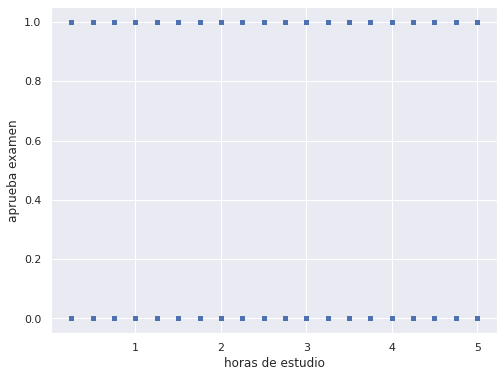

In [12]:
#Con el siguiente grafico podremos ver la cantidad de personas que aprueban o pierden segun las horas que va estudiando
#La intuicion nos diria que tendremos pocos aprobados con pocas horas de estudio y mas aprobados con mas horas de estudio

X = df['horas']
y = df['aprueba']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('horas de estudio')
plt.ylabel('aprueba examen')
plt.show()

In [ ]:
"""
Con lo anterior ya vemos algo extraño, con pocas horas de estudio o con muchas 
horas de estudio, la cantidad de aprobados y reprobados es la misma. Esto para nuestra
intuicion no tiene sentido, pues lo que nos dice el grafico es que no importa las
horas que dedica un estudiante a estudiar, las probabilidades que tiene de aprobar
o reprobar el examen son las mismas, como lanzar una moneda al aire, de 50/50.
Esto nos dice que bien los datos estan erroneos, amañados, son insuficientes o no 
son realmente relacionados.
"""

### 4. Entrenar la Inteligencia Artificial

In [13]:
#En X colocaremos el tiempo de estudio que tomaron los estudiantes antes del examen
#apilamos los datos que vienen en 1d a 2d  
#opcion 1: usamos np.c_
#X = pd.DataFrame(np.c_[df['horas']], columns = ['horas'])
#opcion2: usamos .reshape(-1, 1)
X = np.array(df['horas']).reshape(-1, 1)
#En Y colocaremos el resultado del examen (1 / 0 ) (aprobado / reprobado)
y= np.array(df['aprueba'])
print(X)

[[0.5 ]
 [2.  ]
 [0.75]
 ...
 [2.75]
 [4.75]
 [4.  ]]


### 5. Se importa la clase LogisticRegresion de scikit-learn

In [14]:
from sklearn.linear_model import LogisticRegression #clase de regresión logistica disponsible en sklearn
regresion_logistica = LogisticRegression() #Creamos una instancia/variable/casilla/espacioEnMiMemoria de la Regresión Logística

### 6.  Entrenar la regresión logística con los datos de entrenamiento

In [15]:
#entrenando modelo de regresión logistica
regresion_logistica.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 7. Realizar predicciones

En esta parte averiguaremos, si los datos son correctos, en intentar predecir que resultado tendra un estudante si estudia X horas antes de un examen. Como sabemos en este momento la base de datos que estamos trabajando tiene un fallo, por lo que es comprencible que la prediccion que haga la IA no sea confiable.

In [16]:
#definimos que pasa si el estudiante estudia entre 1 a 6 horas
X_nuevo = np.array([1, 2, 3, 4, 5, 6]).reshape(-1,1)
#ejecutamos la predicción
prediccion = regresion_logistica.predict(X_nuevo)
print(prediccion)

[0 0 0 1 1 1]


### 8. Generando probabilidades de la prediccion

In [17]:
probabilidades_prediccion = regresion_logistica.predict_proba(X_nuevo)
#la primera columna es la probabilidad de reprobar (0)
#la segunda columna es  la probabilidad de aprobar (1)

print(probabilidades_prediccion)

[[0.5112111  0.4887889 ]
 [0.50683522 0.49316478]
 [0.50245829 0.49754171]
 [0.49808099 0.50191901]
 [0.49370398 0.50629602]
 [0.48932793 0.51067207]]


In [18]:
#si solo nos interesa la probabilidad de aprobar
print(probabilidades_prediccion[:,1])

[0.4887889  0.49316478 0.49754171 0.50191901 0.50629602 0.51067207]


Rectificamos que la probabilidad de aprobar del examen ronda el 50/50, practicamente el azar, por lo que sabemos y comprobamos que la data que tenemos no es confiable o directamente esta incompleta.

## Ejercicio 2

### database = ( horas_estudio_tutorias_vs_aprobacion.csv )

Ahora vamos a tratar de completar la base de datos anteriormente dada, para eso agregaremos las horas trabajadas en tutoria de cada estudiante.
Un aspecto que no mirabamos anteriormente es que, las horas de estudio de un estudiante no necesariamente quiere decir que comprenda el tema, en otras palabras, estabamos evaluando a los estudiantes con una misma capacidad de aprendizaje, como sabemos que no son maquinas si no seres humanos, es comprencible que unos estudiantes necesiten menos horas que otros al estudiar un tema para un examen.

Trabajaremos ahora con la base de datos:

https://github.com/OnRuiso/Deep-Learning-/blob/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T6/horas_estudio_tutorias_vs_aprobacion.csv

Que en raw seria:

https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T6/horas_estudio_tutorias_vs_aprobacion.csv

### 1. Importar las librerias


In [19]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### 2. Importar desde Github

In [20]:
df = pd.DataFrame()
df = pd.read_csv("https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T6/horas_estudio_tutorias_vs_aprobacion.csv")

### 3. Datos de la DataBase

In [32]:
print(df.keys())

Index(['horas_autoestudio_diario', 'tutorias_mes', 'aprobo_perdio'], dtype='object')


In [25]:
df.head(3)

,horas_autoestudio_diario,tutorias_mes,aprobo_perdio
0,7,27,1
1,2,43,0
2,7,26,1


In [26]:
df.shape 

(1000, 3)

In [27]:
df.isnull().sum()

horas_autoestudio_diario    0
tutorias_mes                0
aprobo_perdio               0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


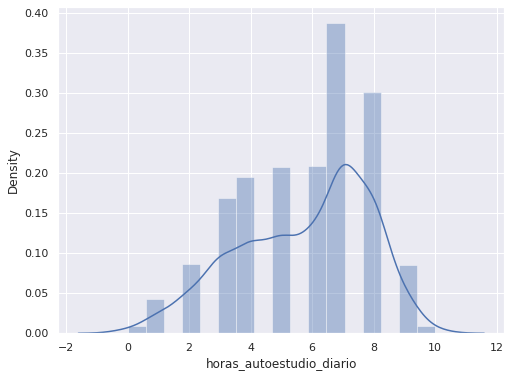

In [29]:
#Lo que nos interesa ver es la relacion de horas con el resultado
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(df['horas_autoestudio_diario'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


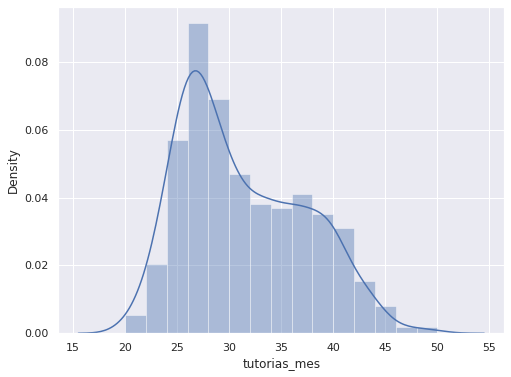

In [30]:
#Lo que nos interesa ver es la relacion de tutorias con el resultado
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(df['tutorias_mes'])
plt.show()

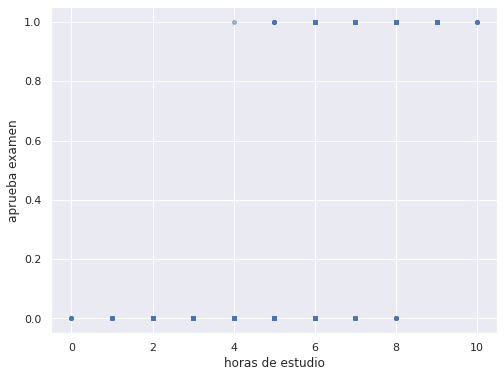

In [33]:
#Relacion directa de horas de estudio con resultado
X = df['horas_autoestudio_diario']
y = df['aprobo_perdio']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('horas de estudio')
plt.ylabel('aprueba examen')
plt.show()

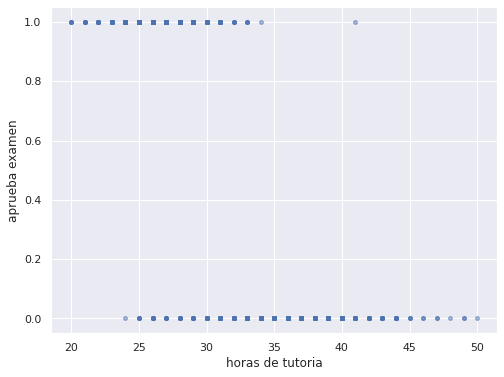

In [34]:
#Relacion directa de tutorias con resultado
X = df['tutorias_mes']
y = df['aprobo_perdio']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('horas de tutoria')
plt.ylabel('aprueba examen')
plt.show()

Ahora observamos un comportamiento diferente de las graficas donde tenemos que:
1. Si se tiene pocas horas de auto-estudio se perdera el examen
2. Si se tiene muchas horas de auto-estudio se aprobara el examen
3. Si se estudia entre 4 y 8 horas aun es una respuesta de azar

Y...

4. Si se tienen pocas horas de tutoria se aprobara el estudio se perdera el examen
5. si se tienen muchas horas de tutoria se perdera el examen
6. Si se tienen de 25 a 34 horas de estudio el resultado sera al azar.

Ahora bien, debemos analizar la relacion entre ambas variables de estudio que en grafica, ya son contrarias.

### 4. Entrenar la IA

In [38]:
X = np.array(df['tutorias_mes'],df['horas_autoestudio_diario']).reshape(-1, 1)
y= np.array(df['aprobo_perdio'])
#print(X)

### 5. Importar LogisticRegresion

In [39]:
from sklearn.linear_model import LogisticRegression #clase de regresión logistica disponsible en sklearn
regresion_logistica = LogisticRegression() #Creamos una instancia/variable/casilla/espacioEnMiMemoria de la Regresión Logística

### 6. Entrenar Regresion Logistica

In [40]:
regresion_logistica.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 7. Predicciones

In [41]:
#definimos que pasa si el estudiante estudia entre 1 a 6 horas
X_nuevo = np.array([1, 2, 3, 4, 5, 6]).reshape(-1,1)
#ejecutamos la predicción
prediccion = regresion_logistica.predict(X_nuevo)
print(prediccion)

[1 1 1 1 1 1]


### 8.Probabilidad de la Prediccion

In [42]:
probabilidades_prediccion = regresion_logistica.predict_proba(X_nuevo)
#la primera columna es la probabilidad de reprobar (0)
#la segunda columna es  la probabilidad de aprobar (1)

print(probabilidades_prediccion)

[[1.97455385e-09 9.99999998e-01]
 [3.91874844e-09 9.99999996e-01]
 [7.77724452e-09 9.99999992e-01]
 [1.54349109e-08 9.99999985e-01]
 [3.06325041e-08 9.99999969e-01]
 [6.07940202e-08 9.99999939e-01]]


In [43]:
#si solo nos interesa la probabilidad de aprobar
print(probabilidades_prediccion[:,1])

[1.         1.         0.99999999 0.99999998 0.99999997 0.99999994]


Ahora bien, podemos deducir que la primera base de datos que trabajamos estaba incompleta. La cantidad de horas de estudio se dara por varios factores intrinsecos al estudiante y no tienen relacion directa con el resultado en un examen. Sin embargo las horas de tutoria es una accion mas directa con el estudiante, por lo que entendera mas de un tema al asistir con estas. Sin embargo esta no asegura que el estudiante apruebe la materia.
Al juntar ambos datos damos con una prediccion mas segura, con los datos de cuanto estudia un estudiante por su cuenta y cuanto asiste a tutoria.

El unico problema sin embargo es que los datos son contrarios entre si ...

## Ejercicio 3

ahora utilizaremos una nueva base de datos con mayor numero de datos, esta se llama "mercadeo_bancario".

https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T6/mercadeo_bancario_original.csv



### 1. Datos Originales

In [54]:
# Importar Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Importar desde github
df = pd.DataFrame()
df = pd.read_csv("https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T6/mercadeo_bancario_original.csv",encoding='utf-8')

In [55]:
# Columnas que hay
print(df.keys())

Index(['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
       'anterior_contacto', 'numero_empleados', 'si_no'],
      dtype='object')


In [56]:
df.head(3) #primeras tres filas de datos

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1


In [57]:
df.shape #Tamaño de la base de datos

(41188, 19)

In [58]:
df.isnull().sum() #Ver si hay datos nulos

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

### 2. Equivalencia de datos

Existe un problema con esta base de datos y es que muchos de los mismos son valores de tipo string, con ellos no podemos calcular graficamente, ni tampoco entrenar la IA, pues esta ultima solo recibe datos numericos, por lo que traeremos la misma base de datos pero con los datos transformados.

Para las columnas de Educacion:


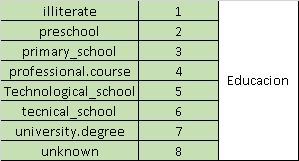

Para los datos de trabajo:

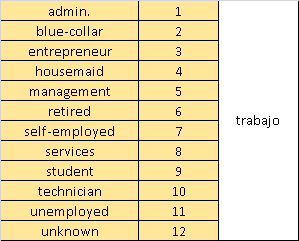

Para los datos de estado civil:

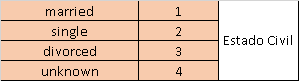

Para los datos de contacto:

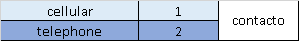

Para los datos de dia de la semana:

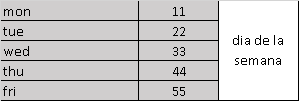

Para los datos de los meses:

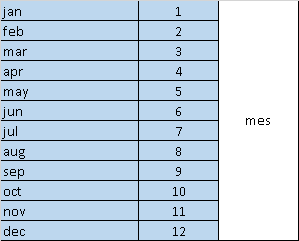

Para todos los datos que tenian [yes/no]:

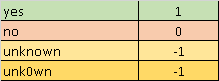

### 3. Datos Transformados

La base de datos que ahora trabajaremos sera:

https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T6/mercadeo_bancario_transformado.csv


In [59]:
# Importar Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Importar desde github
df = pd.DataFrame()
df = pd.read_csv("https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T6/mercadeo_bancario_transformado.csv",encoding='utf-8')

In [60]:
# Columnas que hay
print(df.keys())

Index(['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
       'anterior_contacto', 'numero_empleados', 'si_no'],
      dtype='object')


In [61]:
df.head(3) #primeras tres filas de datos

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,2,1,2,7,-1,1,0,268017,0,5,1,8,44,210,43,0,88,0
1,53,10,1,8,1,0,0,0,0,0,0,1,11,55,138,0,0,14,0
2,28,5,2,7,3,0,1,0,308036,0,0,1,6,44,339,27,2,1993,1


In [62]:
df.shape #Tamaño de la base de datos

(41188, 19)

In [63]:
df.isnull().sum() #Ver si hay datos nulos

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

### Datos Graficados

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


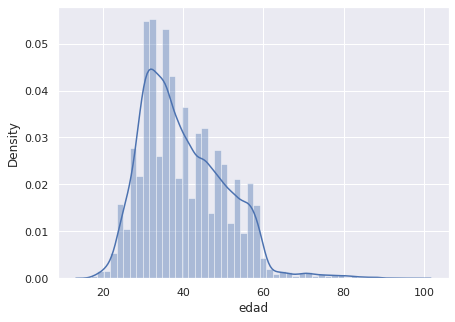

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


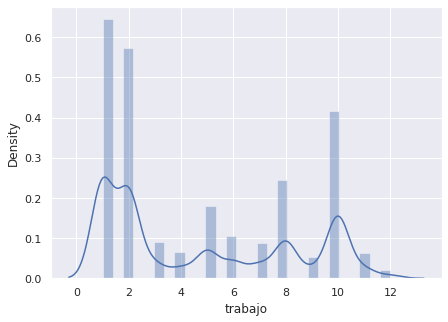

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


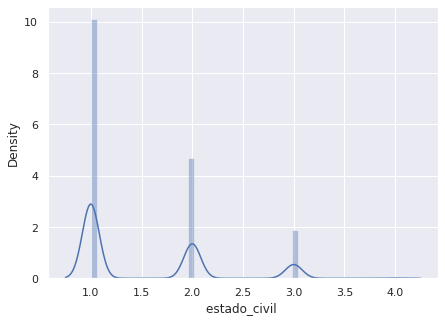

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


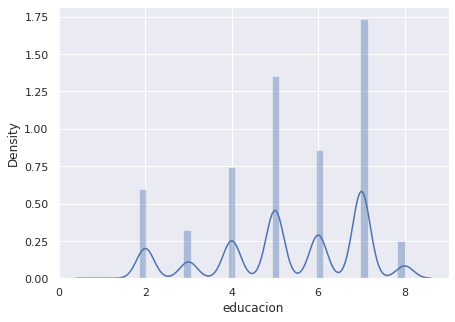

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


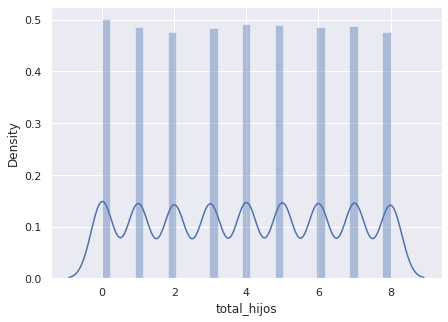

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


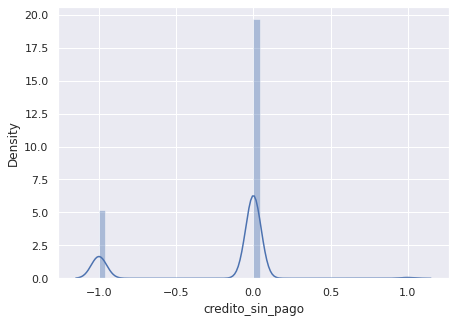

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


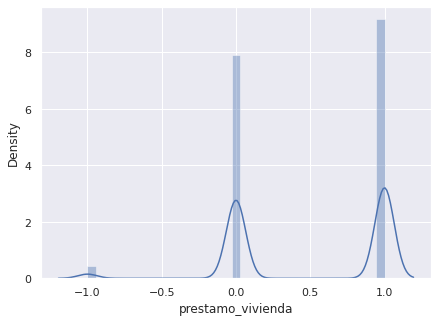

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


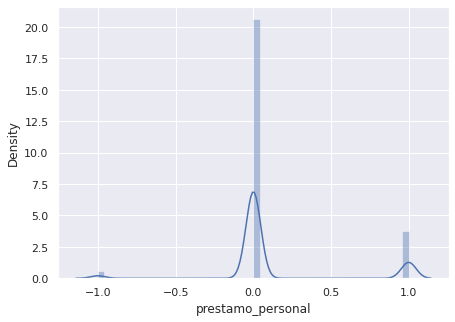

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


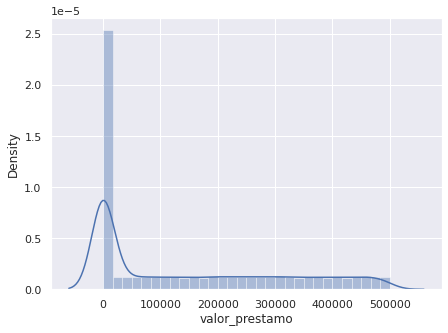

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


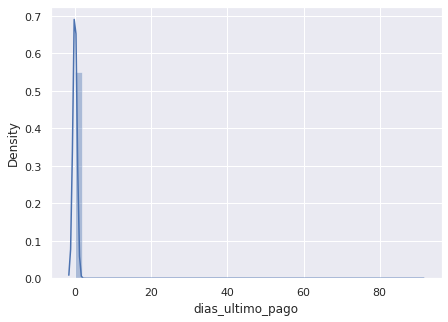

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


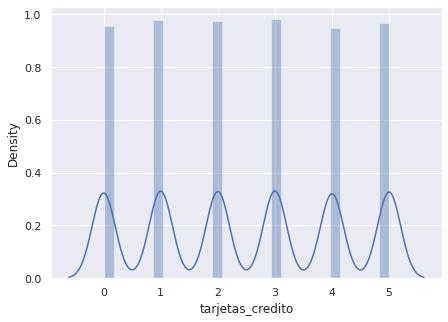

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


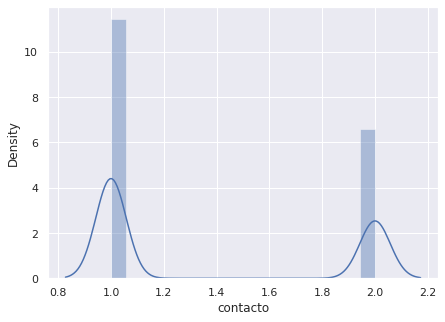

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


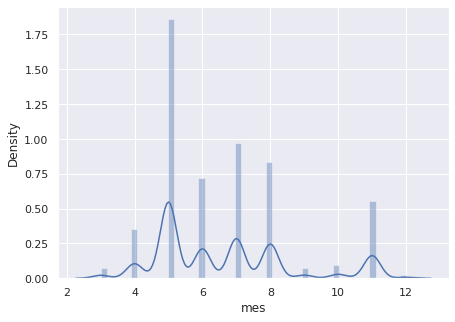

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


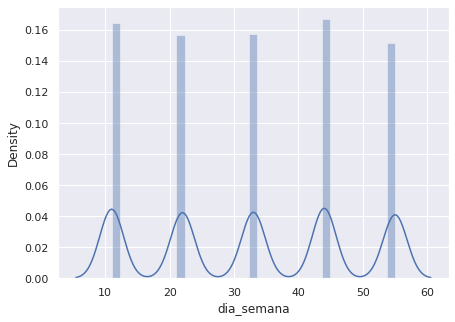

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


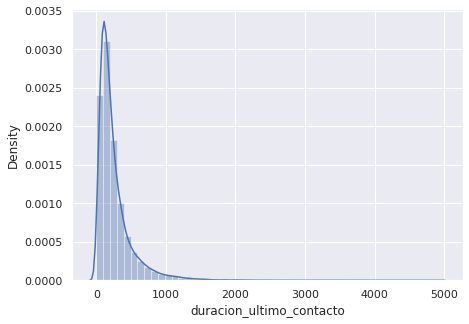

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


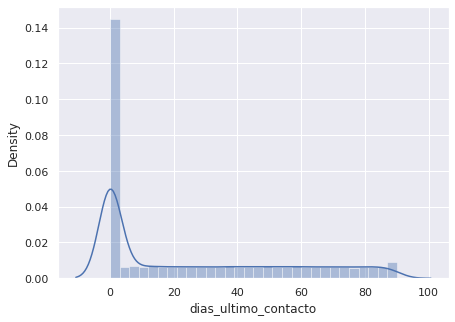

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


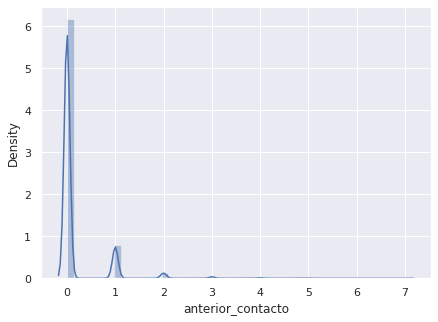

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


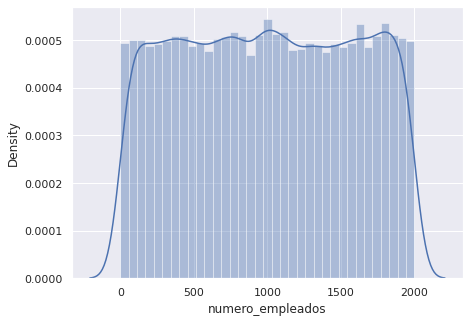

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


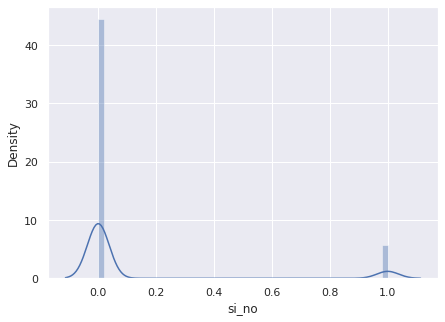

In [126]:
sns.set(rc={'figure.figsize':(7,5)})
sns.distplot(df['edad'])
plt.show()
sns.distplot(df['trabajo'])
plt.show()
sns.distplot(df['estado_civil '])
plt.show()
sns.distplot(df['educacion'])
plt.show()
sns.distplot(df['total_hijos'])
plt.show()
sns.distplot(df['credito_sin_pago'])
plt.show()
sns.distplot(df['prestamo_vivienda'])
plt.show()
sns.distplot(df['prestamo_personal'])
plt.show()
sns.distplot(df['valor_prestamo'])
plt.show()
sns.distplot(df['dias_ultimo_pago'])
plt.show()
sns.distplot(df['tarjetas_credito'])
plt.show()
sns.distplot(df['contacto'])
plt.show()
sns.distplot(df['mes'])
plt.show()
sns.distplot(df['dia_semana'])
plt.show()
sns.distplot(df['duracion_ultimo_contacto'])
plt.show()
sns.distplot(df['dias_ultimo_contacto'])
plt.show()
sns.distplot(df['anterior_contacto'])
plt.show()
sns.distplot(df['numero_empleados'])
plt.show()
sns.distplot(df['si_no'])
plt.show()

In [93]:
df.edad.max()

98